In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Difference kills continuity
In R:
```
n = 100
whiteNoise = rnorm(n=n)
randomWalk = cumsum(whiteNoise)
randomWalkDiff = diff(randomWalk)
par(mfrow=c(2, 1))
plot(randomWalk)
plot(randomWalkDiff)
```

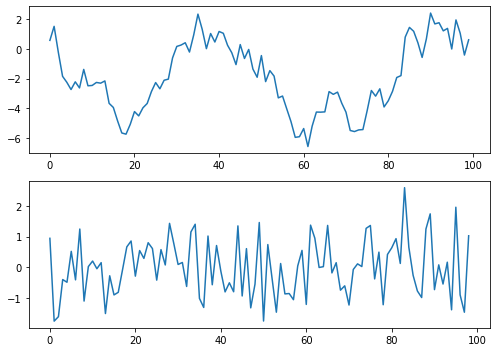

In [2]:
n = 100
whiteNoise = np.random.normal(size=n)
randomWalk = np.cumsum(whiteNoise)
randomWalkDiff = np.diff(randomWalk)

fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
axes[0].plot(randomWalk)
axes[1].plot(randomWalkDiff)
fig.tight_layout()
plt.show()

## 2. Logarithm and power < 1.
In R:
```
# Symmetricizes positive distribution
n = 1000
expSample = rexp(n=n)
expSampleLog = log(expSample)

hist(expSample)
hist(expSampleLog)

plot(expSample)
plot(expSampleLog)
```

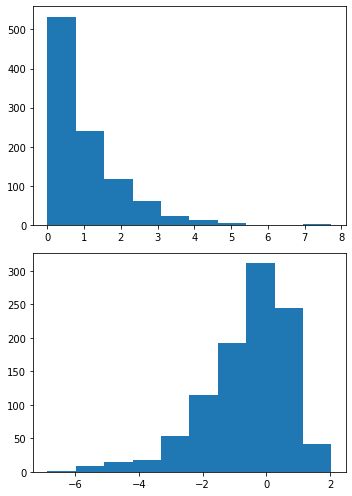

In [3]:
n = 1000
expSample = np.random.exponential(size=n)
expSampleLog = np.log(expSample)

fig, axes = plt.subplots(nrows=2, figsize=(5, 7))
axes[0].hist(expSample)
axes[1].hist(expSampleLog)
fig.tight_layout()
plt.show()

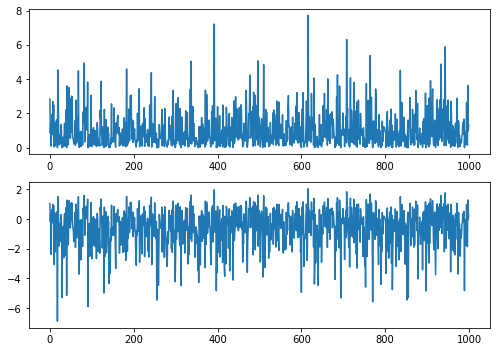

In [4]:
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
axes[0].plot(expSample)
axes[1].plot(expSampleLog)
fig.tight_layout()
plt.show()

too much, try power transformation

In R:
```
lambda = 1/3
expSamplePower = (expSample^lambda - 1) / lambda

hist(expSample)
hist(expSamplePower)
```

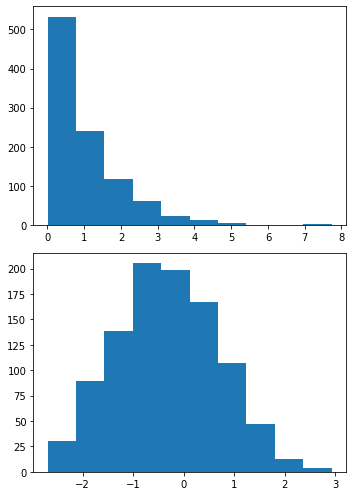

In [5]:
my_lambda = 1/3
expSamplePower = (expSample**my_lambda - 1) / my_lambda

fig, axes = plt.subplots(nrows=2, figsize=(5, 7))
axes[0].hist(expSample)
axes[1].hist(expSamplePower)
fig.tight_layout()
plt.show()

show as time series

```
plot(expSample)
plot(expSamplePower)
```

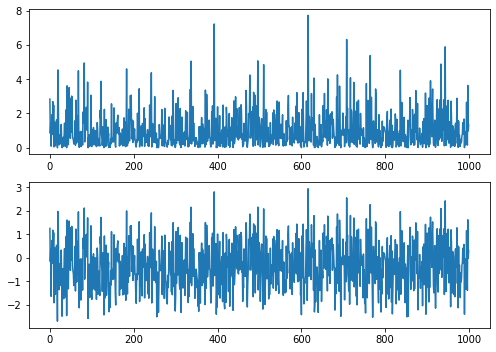

In [6]:
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
axes[0].plot(expSample)
axes[1].plot(expSamplePower)
fig.tight_layout()
plt.show()

## log stabilizes variance? Does not work.
In R:
```
n = 1000
myMean = 100000
mySd = 1
whiteNoise = ts(rnorm(n=n, sd = mySd))
whiteNoiseTimesT = whiteNoise * time(whiteNoise)
whiteNoiseTimesTShifted = whiteNoiseTimesT + myMean
whiteNoiseTimesTShiftedLog = log(whiteNoiseTimesTShifted)

plot(whiteNoiseTimesTShifted)
plot(whiteNoiseTimesTShiftedLog)
difSeries = diff(whiteNoiseTimesTShifted)
plot(difSeries)
```

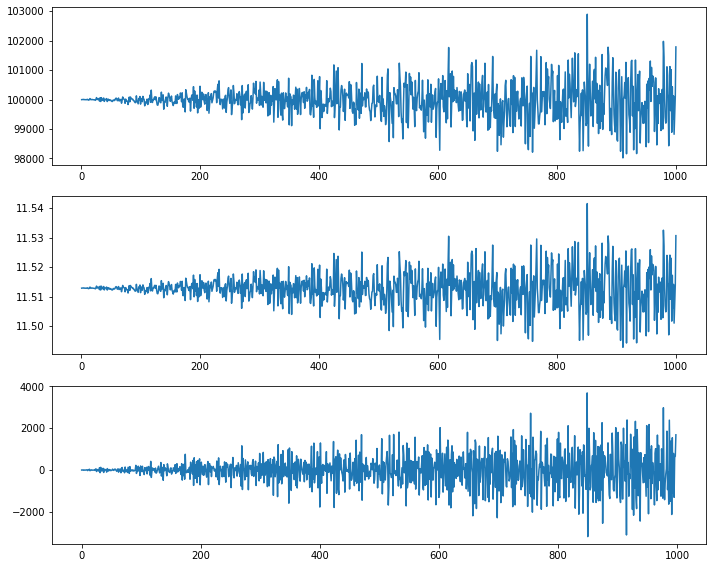

In [7]:
n = 1000
myMean = 100000
mySd = 1
whiteNoise = pd.Series(np.random.normal(scale=mySd, size=n), index=np.arange(1, n + 1))
whiteNoiseTimesT = whiteNoise * whiteNoise.index
whiteNoiseTimesTShifted = whiteNoiseTimesT + myMean
whiteNoiseTimesTShiftedLog = np.log(whiteNoiseTimesTShifted)

fig, axes = plt.subplots(nrows=3, figsize=(10, 8))
axes[0].plot(whiteNoiseTimesTShifted)
axes[1].plot(whiteNoiseTimesTShiftedLog)
diffSeries = np.diff(whiteNoiseTimesTShifted)
axes[2].plot(diffSeries)
fig.tight_layout()
plt.show()

### 2a. 
Logarithm did not help. We may try directly the inverse transformation. Frist,
we need to demean or center it

In R:
```
meanHat = mean(whiteNoiseTimesTShifted)
meanHat
myMean
whiteNoiseTimesTShiftedUnshifted = whiteNoiseTimesTShifted - meanHat
plot(whiteNoiseTimesTShiftedUnshifted)
whiteNoiseTimesTShiftedUnshiftedDivided = whiteNoiseTimesTShiftedUnshifted / time(whiteNoiseTimesTShiftedUnshifted)

plot(whiteNoiseTimesTShifted)
plot(whiteNoiseTimesTShiftedUnshiftedDivided)
```

meanHat = 99978.44231527066
myMean = 100000


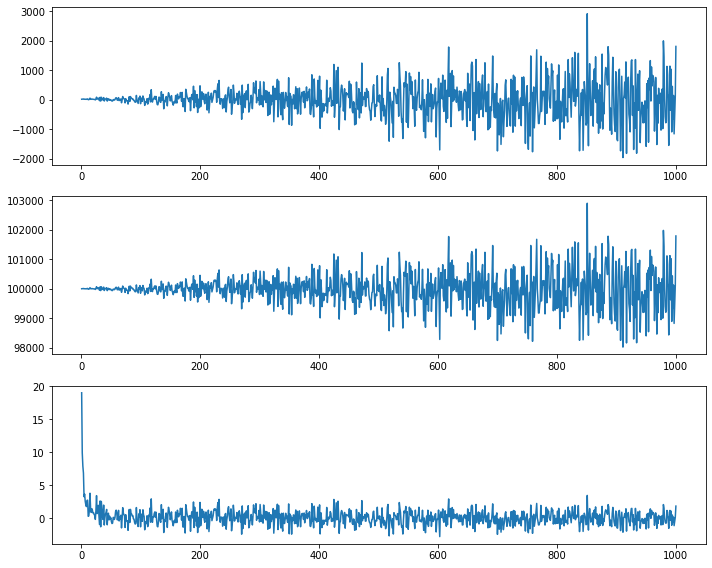

In [8]:
meanHat = np.mean(whiteNoiseTimesTShifted)
print("meanHat =", meanHat)
print("myMean =", myMean)
whiteNoiseTimesTShiftedUnshifted = whiteNoiseTimesTShifted - meanHat

fig, axes = plt.subplots(nrows=3, figsize=(10, 8))
axes[0].plot(whiteNoiseTimesTShiftedUnshifted)
whiteNoiseTimesTShiftedUnshiftedDivided = whiteNoiseTimesTShiftedUnshifted / whiteNoiseTimesTShiftedUnshifted.index
axes[1].plot(whiteNoiseTimesTShifted)
axes[2].plot(whiteNoiseTimesTShiftedUnshiftedDivided)
fig.tight_layout()
plt.show()

A bit more transparent way to produce a sample with growing variance

In R:
```
s <- c()
for (i in 1:1000) {
  s <- c(s, rnorm(1, mean = 100, sd = 0.1 * i))
}
par(mfrow = c(1, 1))
plot(as.ts(s))
```

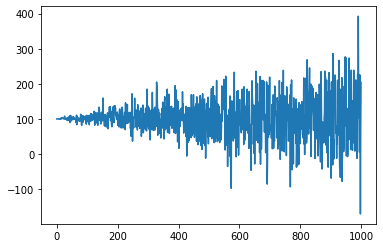

In [9]:
s = []

for i in range(1, 1001):
    s.append(np.random.normal(loc=100, scale=.1 * i, size=1))

plt.plot(s)
plt.show()

## 3. How to extract trend 
In R:
```
n = 100
whiteNoise = ts(rnorm(n=n, sd = 100))
timeSequence = time(whiteNoise)
beta0 = 1
beta1 = 2
trend = beta0 + beta1 * timeSequence
trendedNoise = trend + whiteNoise
fit = lm(trendedNoise ~ timeSequence)
coef(fit)
estimatedTrend = fitted(fit)
plot(trend)
lines(estimatedTrend, col = "blue")
```

Intercept       11.094168
timeSequence     1.773391
dtype: float64


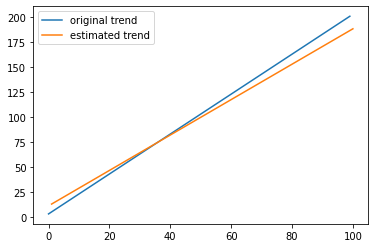

In [10]:
n = 100
whiteNoise = pd.Series(np.random.normal(scale=100, size=n), index=np.arange(1, n + 1))
timeSequence = whiteNoise.index
beta0 = 1
beta1 = 2
trend = beta0 + beta1 * timeSequence
trendedNoise = trend + whiteNoise
data_reg = pd.DataFrame({"trendedNoise": trendedNoise, "timeSequence": timeSequence})
fit = smf.ols("trendedNoise ~ timeSequence", data=data_reg).fit()
print(fit.params)
estimatedTrend = fit.fittedvalues

plt.plot(trend, label="original trend")
plt.plot(estimatedTrend, label="estimated trend")
plt.legend()
plt.show()

detrend

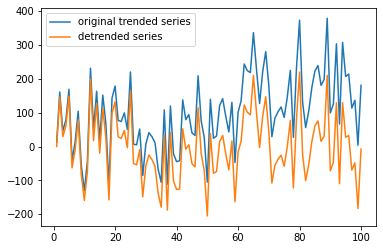

In [14]:
detrended = trendedNoise - estimatedTrend

plt.plot(trendedNoise, label="original trended series")
plt.plot(detrended, label="detrended series")
plt.legend()
plt.show()

## 4. Choose a better regressor
In R:
```
a <- seq(from = 1, to = 10, length.out = 100)
b <- rnorm(100)
c <- a^3 + a^2 + rnorm(100, sd = 100)
par(mfrow = c(1, 2))

plot(b, a, main = 'A vs B')
lines(lowess(b, a), col = 2, lwd = 2)

plot(c, a, main = 'A vs C')
lines(lowess(c, a), col = 2, lwd = 2)
```

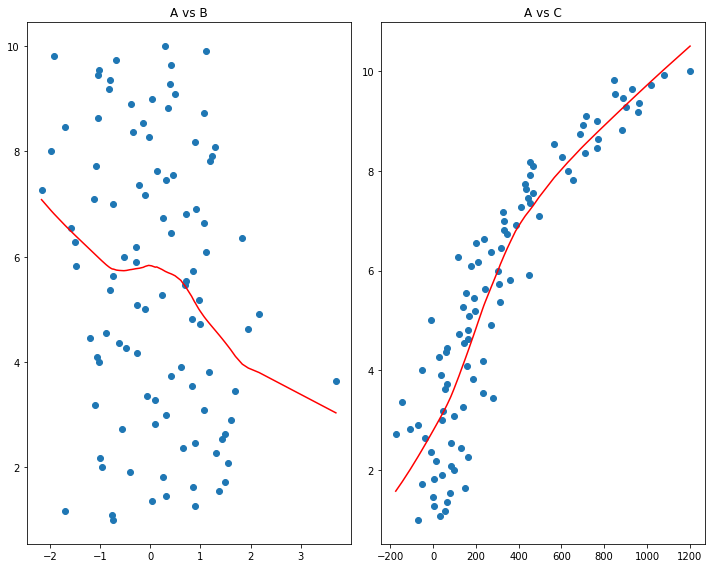

In [12]:
a = np.linspace(start=1, stop=10, num=100)
b = np.random.normal(size=100)
c = a**3 + a**2 + np.random.normal(scale=100, size=100)

fig, axes = plt.subplots(ncols=2, figsize=(10, 8))

axes[0].scatter(b, a)
lowess_b_a = sm.nonparametric.lowess(a, b)
axes[0].plot(lowess_b_a[:, 0], lowess_b_a[:, 1], color="red")
axes[0].set_title("A vs B")

axes[1].scatter(c, a)
lowess_c_a = sm.nonparametric.lowess(a, c)
axes[1].plot(lowess_c_a[:, 0], lowess_c_a[:, 1], color="red")
axes[1].set_title("A vs C")

fig.tight_layout()
plt.show()